In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("pokemon.csv")

In [3]:
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [4]:
# made copy of data
data = df.copy()

In [5]:
# drop unwanted colums
data.drop(["number","type2"],axis=1,inplace=True)

In [6]:
data.head()

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,False


In [7]:
data.tail()

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1067,Glastrier,Ice,580,100,145,130,65,110,30,8,True
1068,Spectrier,Ghost,580,100,65,60,145,80,130,8,True
1069,Calyrex,Psychic,500,100,80,80,80,80,80,8,True
1070,Ice Rider Calyrex,Psychic,680,100,165,150,85,130,50,8,True
1071,Shadow Rider Calyrex,Psychic,680,100,85,80,165,100,150,8,True


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        1072 non-null   object
 1   type1       1072 non-null   object
 2   total       1072 non-null   int64 
 3   hp          1072 non-null   int64 
 4   attack      1072 non-null   int64 
 5   defense     1072 non-null   int64 
 6   sp_attack   1072 non-null   int64 
 7   sp_defense  1072 non-null   int64 
 8   speed       1072 non-null   int64 
 9   generation  1072 non-null   int64 
 10  legendary   1072 non-null   bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 84.9+ KB


In [9]:
data.shape

(1072, 11)

## Clean Data

In [10]:
# remove extea character
data["type1"] = data["type1"].apply(lambda x:x.replace('Graass',"Grass"))

In [11]:
# if legendart is there 1 if not there 0
data["legendary"] = data["legendary"].map({False:0,True:1})

In [12]:
# noDuplicet value in this data
data.duplicated().sum()

0

In [13]:
# no vull value in this data
data.isnull().sum()

name          0
type1         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64

## EDA

In [14]:
data.head()

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,525,80,82,83,100,100,80,1,0
3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,0
4,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,0


In [15]:
# saprate numerical and catigorical colums
catogerical_feature = data.dtypes[data.dtypes == "object"].index

In [16]:
catogerical_feature

Index(['name', 'type1'], dtype='object')

In [17]:
numerical_feature = data.dtypes[data.dtypes != "object"].index

In [18]:
numerical_feature

Index(['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
       'generation', 'legendary'],
      dtype='object')

In [27]:
for i in catogerical_feature:
    print(i,data[i].value_counts(normalize=True)*100)
    print("="*40)

name Bulbasaur               0.093284
Chandelure              0.093284
Joltik                  0.093284
Galvantula              0.093284
Ferroseed               0.093284
                          ...   
Whismur                 0.093284
Loudred                 0.093284
Exploud                 0.093284
Makuhita                0.093284
Shadow Rider Calyrex    0.093284
Name: name, Length: 1072, dtype: float64
type1 Water        12.686567
Normal       10.914179
Grass         8.861940
Bug           7.742537
Psychic       7.462687
Fire          6.250000
Electric      5.876866
Rock          5.597015
Dark          4.477612
Fighting      4.197761
Ghost         4.011194
Ground        3.917910
Poison        3.917910
Dragon        3.824627
Steel         3.638060
Ice           3.544776
Fairy         2.145522
Flying        0.839552
Blastoise     0.093284
Name: type1, dtype: float64


Index(['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
       'generation', 'legendary'],
      dtype='object')


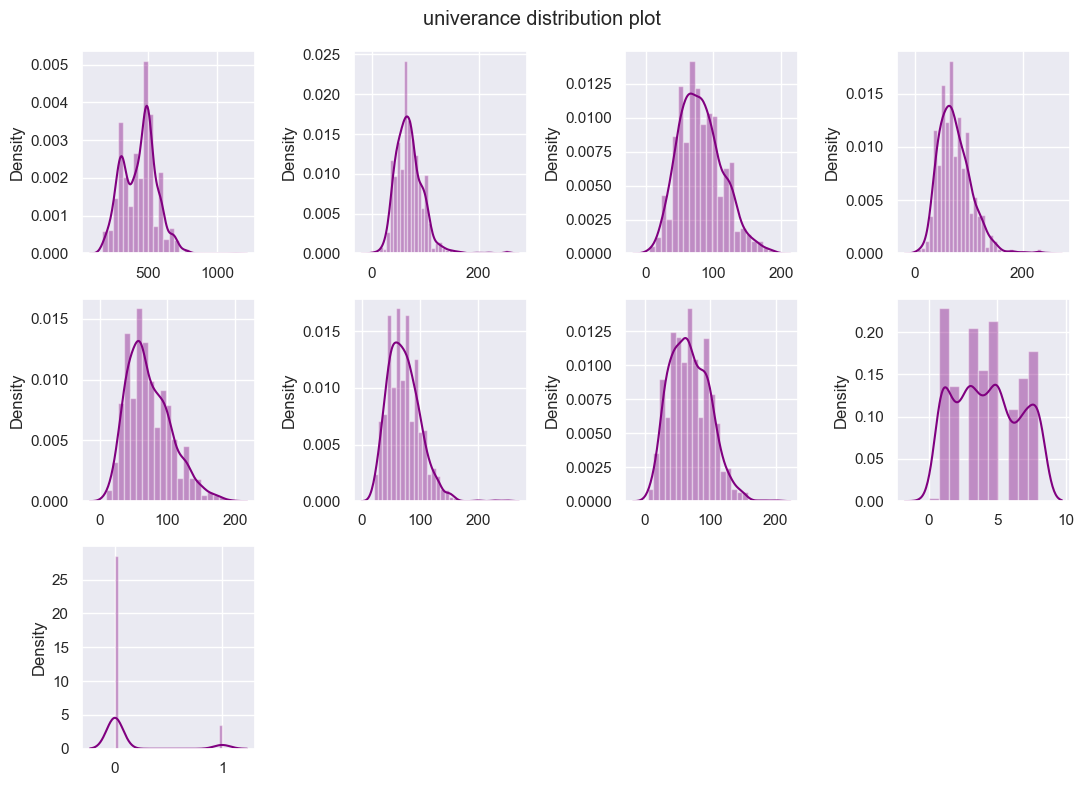

In [32]:
# check distribution of data
print(numerical_feature)
try:
    plt.suptitle("univerance distribution plot")
    for i in range(0,len(numerical_feature)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_feature[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

Index(['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
       'generation', 'legendary'],
      dtype='object')


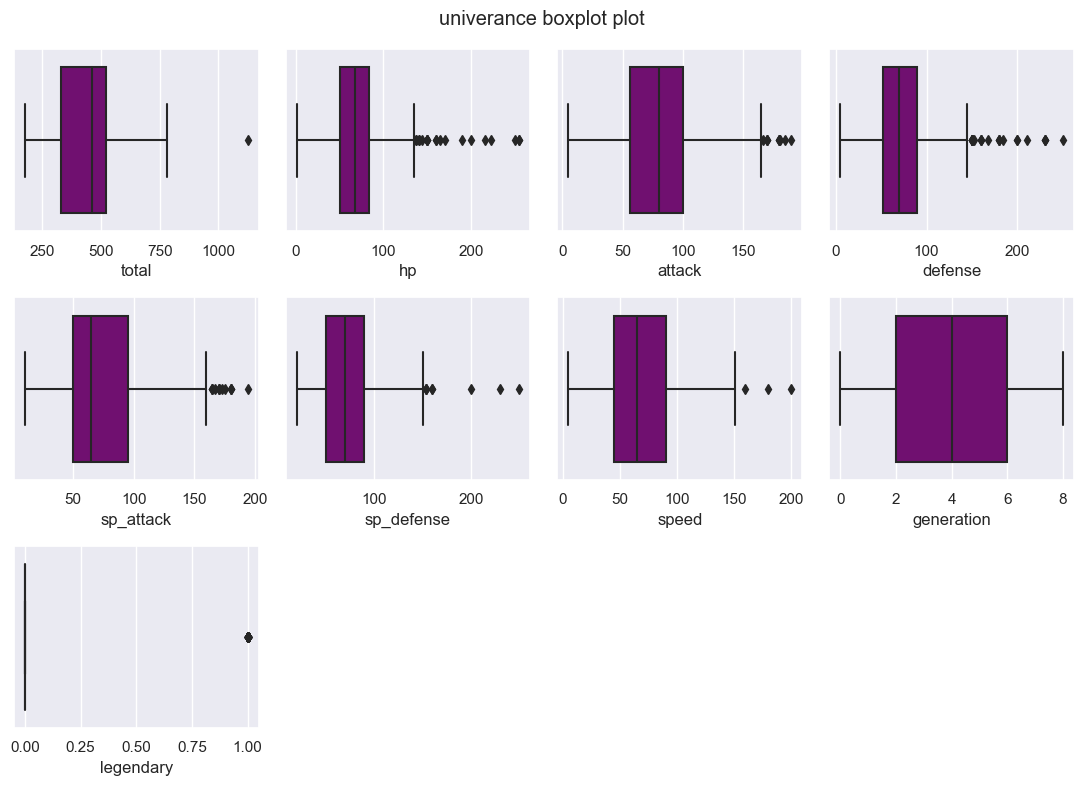

In [34]:
# check outlayers using boxplot
print(numerical_feature)
try:
    plt.suptitle("univerance boxplot plot")
    for i in range(0,len(numerical_feature)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_feature[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

In [47]:
total_score_type = data.groupby(["type1"])["total"].sum().sort_values(ascending=False).reset_index()

<AxesSubplot:xlabel='total', ylabel='type1'>

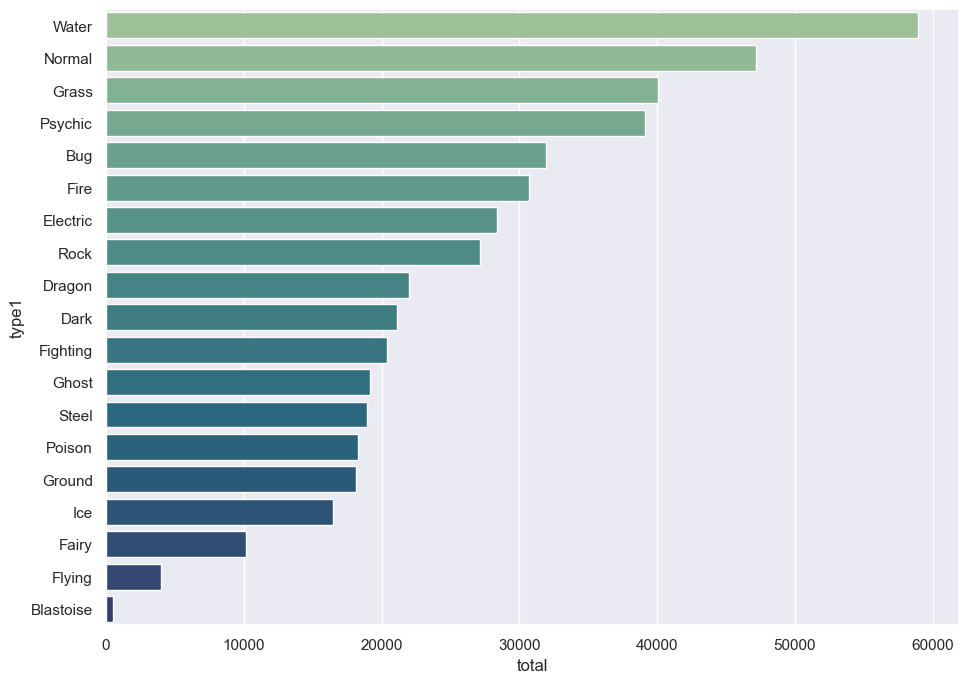

In [50]:
sns.barplot(x="total",y="type1",data=total_score_type,palette='crest')

In [60]:
attack_ranking = data.groupby(["type1"])["attack"].max().sort_values(ascending=False).reset_index()

In [61]:
attack_ranking

,type1,attack
0,Psychic,190
1,Bug,185
2,Grass,181
3,Ground,180
4,Dragon,180
5,Fairy,170
6,Ghost,165
7,Rock,165
8,Normal,160
9,Fire,160


<AxesSubplot:title={'center':'pokemon type and there Attack'}, xlabel='type1', ylabel='attack'>

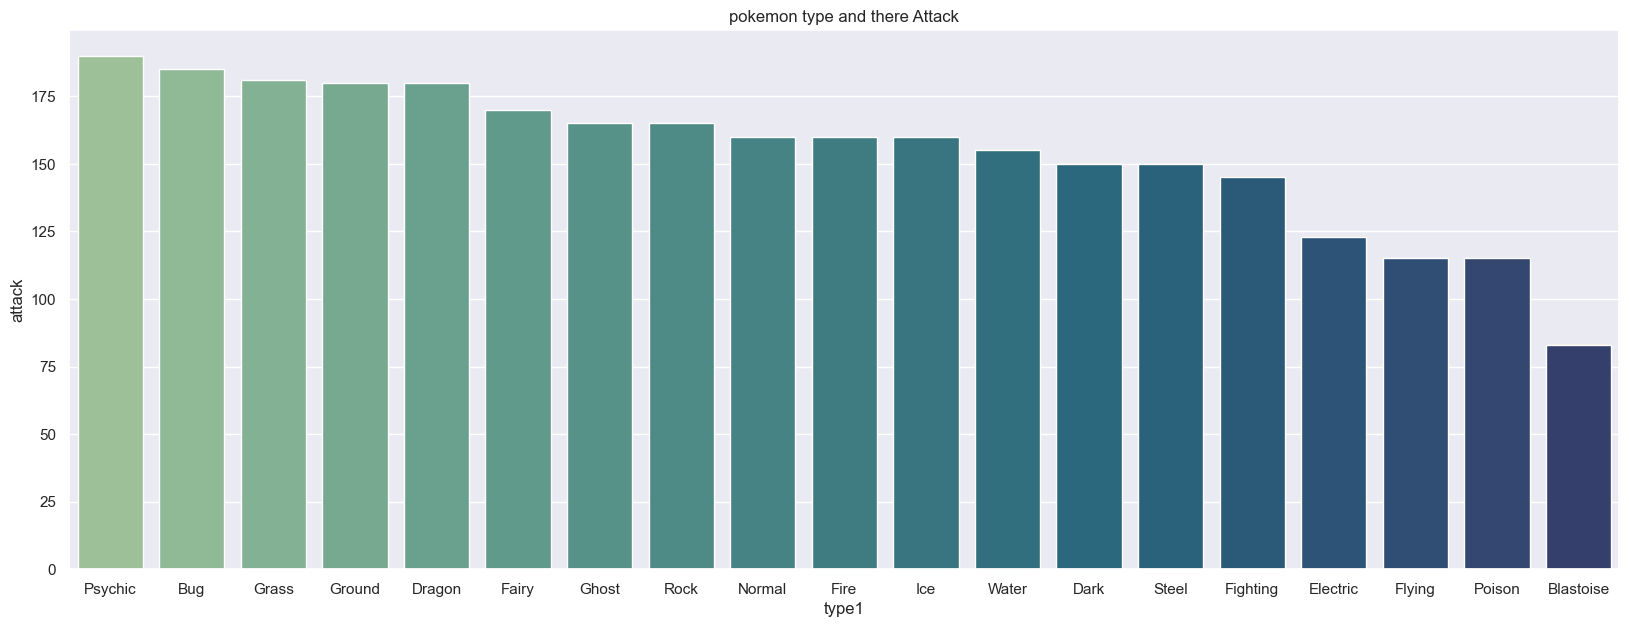

In [72]:
plt.figure(figsize=(20,7))
plt.title("pokemon type and there Attack")
sns.barplot(x="type1",y="attack",data=attack_ranking,palette='crest')

In [68]:
speed = data.groupby(["type1"])["speed"].mean().sort_values(ascending=False).reset_index()

In [69]:
speed

,type1,speed
0,Electric,85.936508
1,Flying,84.777778
2,Dragon,84.341463
3,Psychic,79.675000
4,Blastoise,78.000000
5,Dark,76.937500
6,Fire,75.343284
7,Fighting,72.111111
8,Normal,69.085470
9,Ice,67.026316


<AxesSubplot:title={'center':'pokemon type and there speed'}, xlabel='type1', ylabel='speed'>

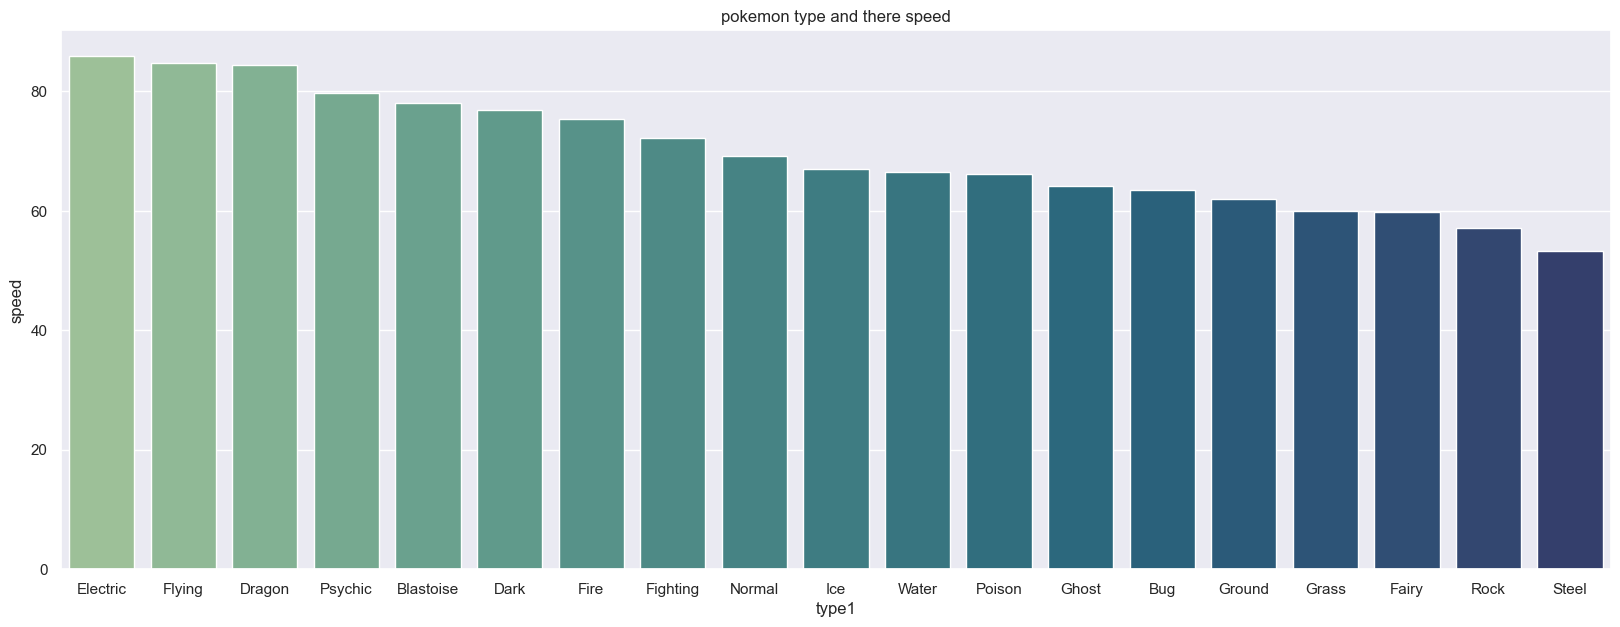

In [73]:
plt.figure(figsize=(20,7))
plt.title("pokemon type and there speed")
sns.barplot(x="type1",y="speed",data=speed,palette='crest')

In [96]:
top10speed_pokenon = data.groupby(["name"])["speed"].sum().sort_values(ascending=False).reset_index().head(10)

In [97]:
top10speed_pokenon

,name,speed
0,Regieleki,200
1,Deoxys Speed Forme,180
2,Ninjask,160
3,Pheromosa,151
4,Mega Alakazam,150
5,Deoxys Normal Forme,150
6,Shadow Rider Calyrex,150
7,Mega Aerodactyl,150
8,Deoxys Attack Forme,150
9,Zacian Crowned Sword Forme,148


<AxesSubplot:title={'center':'top10 highspeed pokemon '}, xlabel='name', ylabel='speed'>

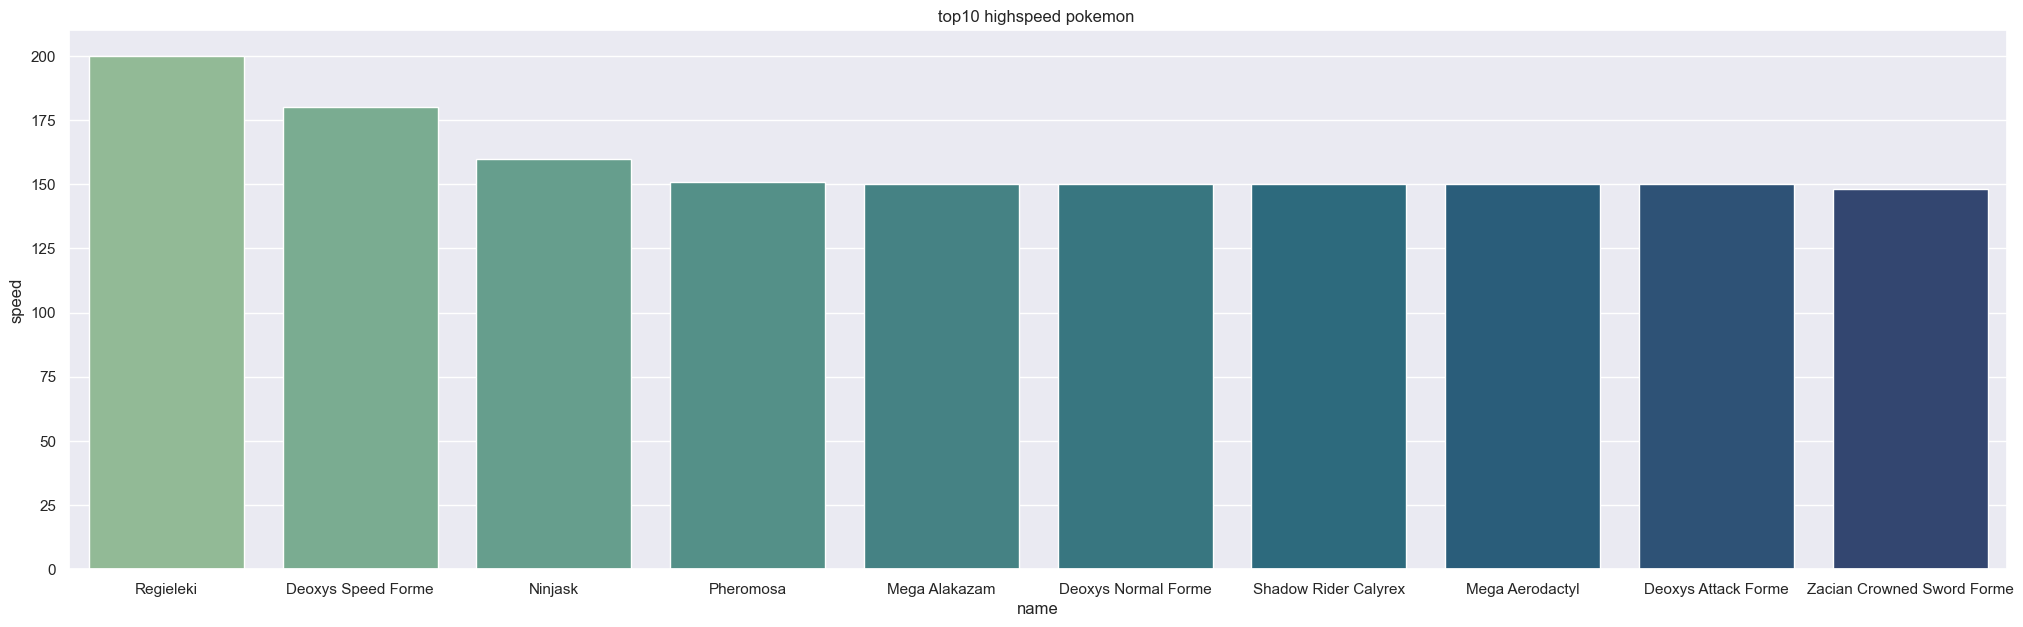

In [104]:
plt.figure(figsize=(25,7))
plt.title("top10 highspeed pokemon ")
sns.barplot(x="name",y="speed",data=top10speed_pokenon,palette='crest')

In [107]:
top10attack = data.groupby(["name"])["attack"].sum().sort_values(ascending=False).reset_index().head(10)

In [108]:
top10attack

,name,attack
0,Mega Mewtwo X,190
1,Mega Heracross,185
2,Kartana,181
3,Deoxys Attack Forme,180
4,Primal Groudon,180
5,Mega Rayquaza,180
6,Black Kyurem,170
7,Zacian Crowned Sword Forme,170
8,Mega Garchomp,170
9,Ultra Necrozma,167


<AxesSubplot:title={'center':'top10 attack of  pokemon '}, xlabel='name', ylabel='attack'>

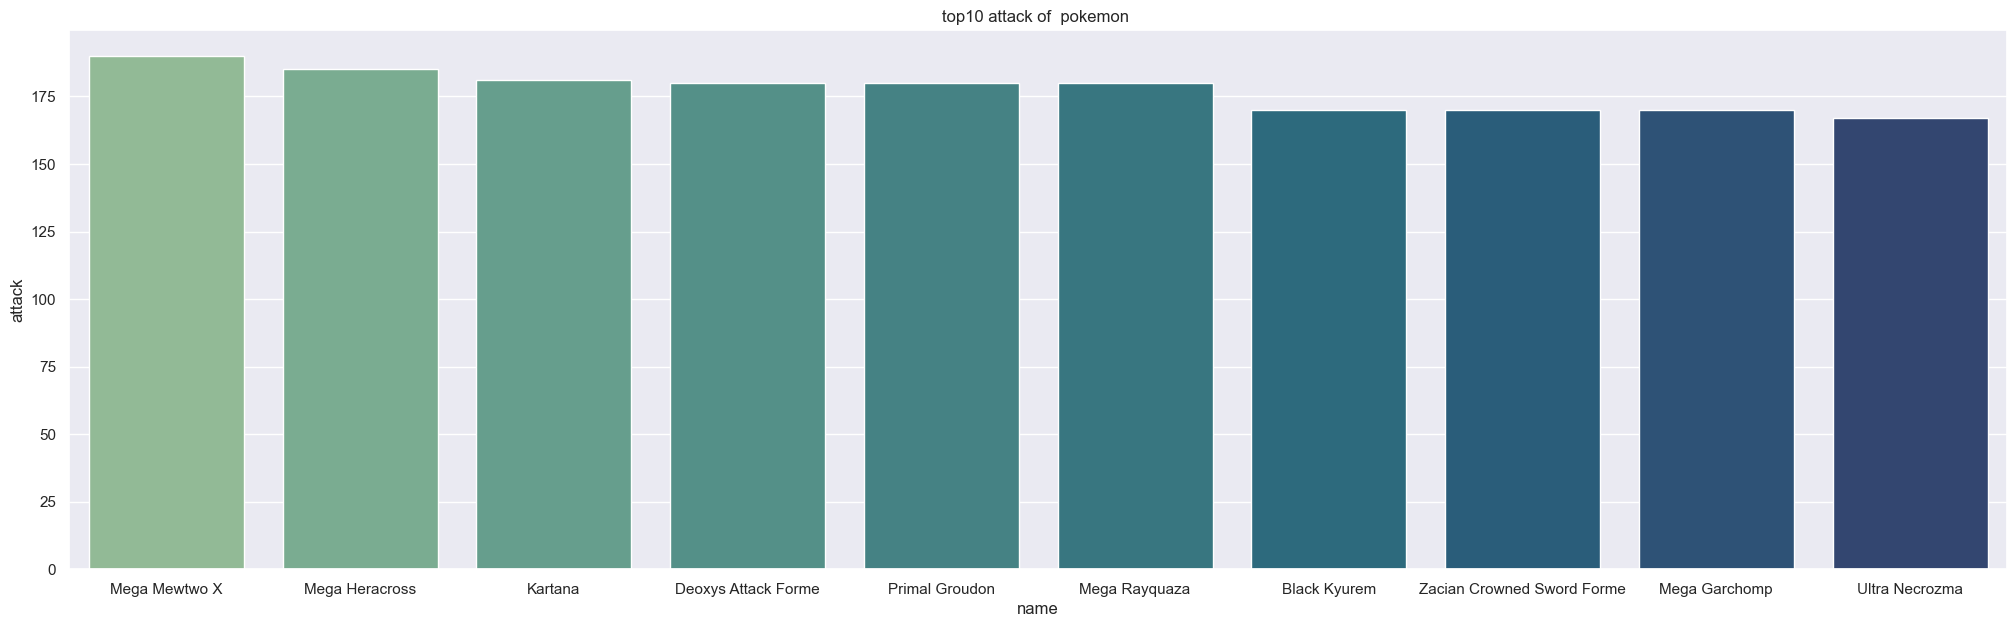

In [110]:
plt.figure(figsize=(25,7))
plt.title("top10 attack of  pokemon ")
sns.barplot(x="name",y="attack",data=top10attack,palette='crest')

In [114]:
special_attack = data.groupby(["name"])["sp_attack"].sum().sort_values(ascending=False).reset_index().head(5)

In [115]:
special_attack

,name,sp_attack
0,Mega Mewtwo Y,194
1,Primal Kyogre,180
2,Deoxys Attack Forme,180
3,Mega Rayquaza,180
4,Mega Alakazam,175


<AxesSubplot:title={'center':'top5 special attack of  pokemon '}, xlabel='name', ylabel='sp_attack'>

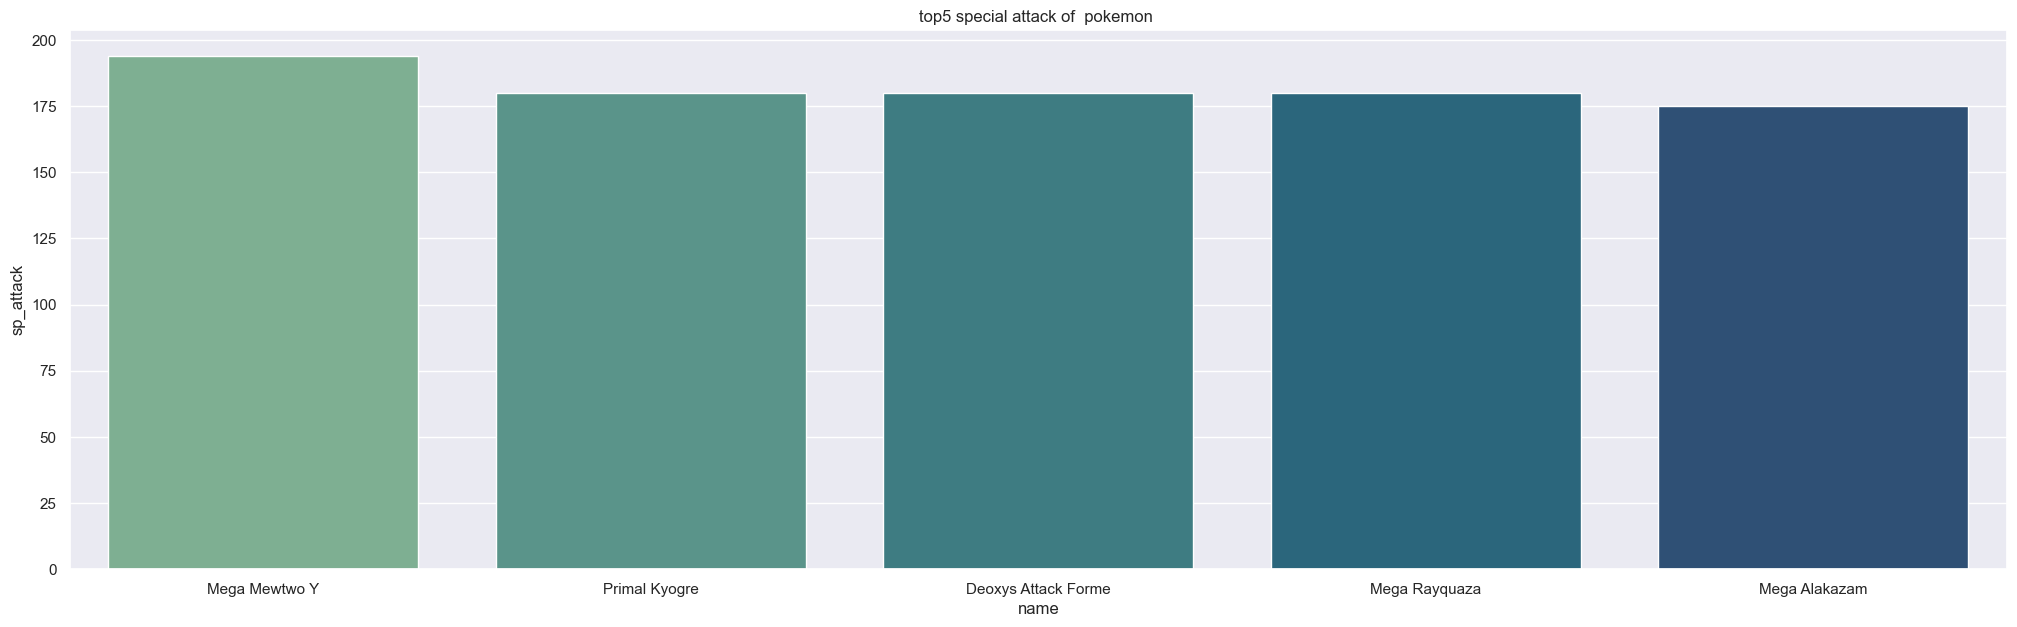

In [117]:
plt.figure(figsize=(25,7))
plt.title("top5 special attack of  pokemon ")
sns.barplot(x="name",y="sp_attack",data=special_attack,palette='crest')

<AxesSubplot:xlabel='type1'>

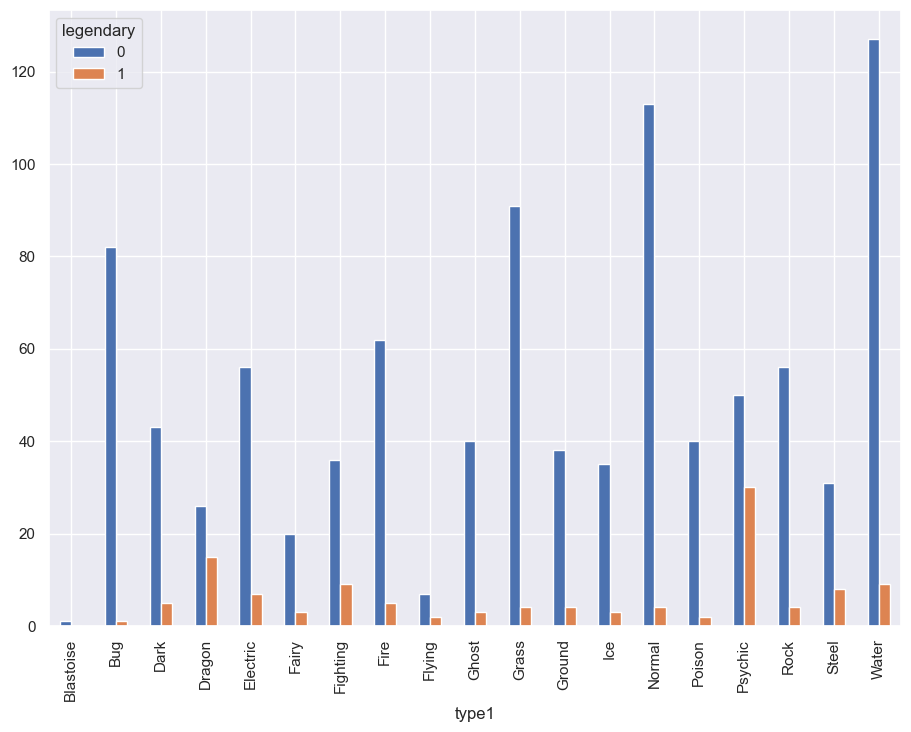

In [119]:
legendry = pd.crosstab(data["type1"],data["legendary"])
legendry.plot(kind="bar")

In [118]:
data

,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,525,80,82,83,100,100,80,1,0
3,Mega Venusaur,Grass,625,80,100,123,122,120,80,1,0
4,Gigantamax Venusaur,Grass,525,80,82,83,100,100,80,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1067,Glastrier,Ice,580,100,145,130,65,110,30,8,1
1068,Spectrier,Ghost,580,100,65,60,145,80,130,8,1
1069,Calyrex,Psychic,500,100,80,80,80,80,80,8,1
1070,Ice Rider Calyrex,Psychic,680,100,165,150,85,130,50,8,1
